In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# --- Section 1: Data Loading ---
print("1. Loading the Iris dataset...")
# The Iris dataset is a classic for both classification and dimensionality reduction.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
target_names = iris.target_names

print("\nDataset loaded successfully. Displaying the first 5 rows of the feature data:")
print(X.head())

1. Loading the Iris dataset...

Dataset loaded successfully. Displaying the first 5 rows of the feature data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# --- Section 2: Data Preprocessing ---
print("\n2. Scaling the features using StandardScaler...")
# PCA is highly sensitive to feature scaling. It's crucial to standardize
# the features before applying the algorithm.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2. Scaling the features using StandardScaler...


In [4]:
# --- Section 3: Applying PCA ---
print("\n3. Applying Principal Component Analysis (PCA)...")
# We'll reduce the dimensionality of the data to 2 principal components
# for easy visualization in a 2D scatter plot.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the 2 principal components
pca_df = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])

# Add the original target labels to the new DataFrame
pca_df['species'] = y
print("\nPCA complete. Displaying the first 5 rows of the transformed data:")
print(pca_df.head())


3. Applying Principal Component Analysis (PCA)...

PCA complete. Displaying the first 5 rows of the transformed data:
   principal_component_1  principal_component_2  species
0              -2.264703               0.480027        0
1              -2.080961              -0.674134        0
2              -2.364229              -0.341908        0
3              -2.299384              -0.597395        0
4              -2.389842               0.646835        0


In [5]:
# Explain the variance ratio
print(f"\nExplained variance ratio by the components:")
print(f"  - Principal Component 1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  - Principal Component 2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  - Total explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")




Explained variance ratio by the components:
  - Principal Component 1: 72.96%
  - Principal Component 2: 22.85%
  - Total explained variance: 95.81%



4. Visualizing the transformed data in a 2D plot...


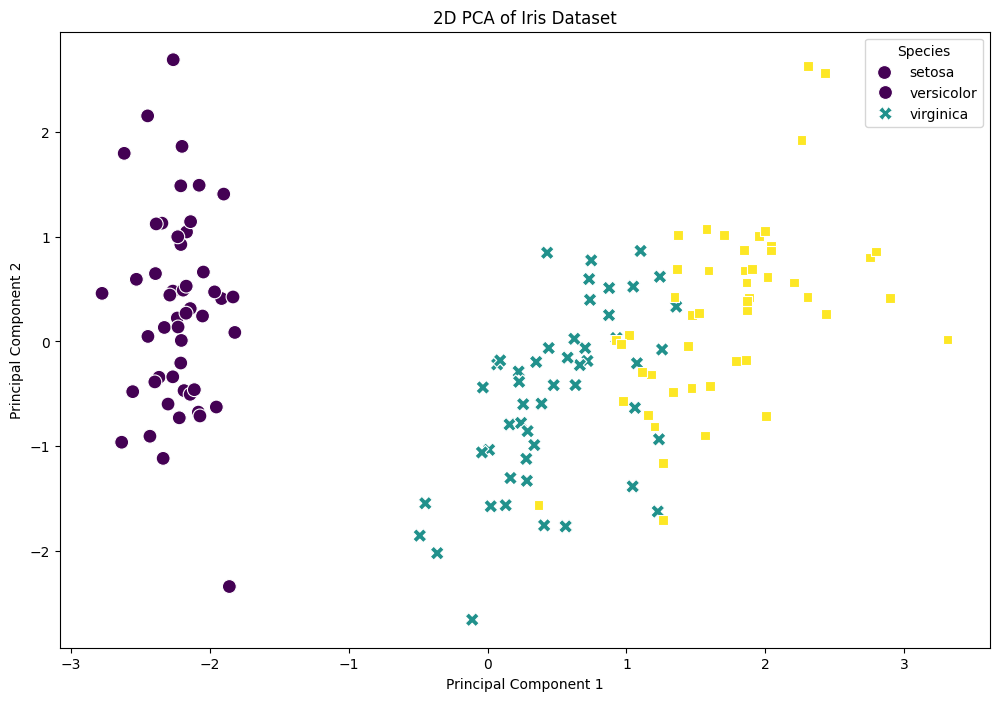


🎉 PCA analysis and visualization are complete!


In [6]:
# --- Section 4: Visualization ---
print("\n4. Visualizing the transformed data in a 2D plot...")
# We will use the two principal components to visualize the clusters.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='principal_component_1',
    y='principal_component_2',
    hue='species',
    palette='viridis',
    style='species',
    data=pca_df,
    s=100
)
# Update the legend labels to be the actual species names
plt.legend(title='Species', labels=target_names)
plt.title('2D PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("\n🎉 PCA analysis and visualization are complete!")
